In [54]:
import os
import pandas as pd

data_path = os.path.join(os.getcwd(), 'data/shapes')

circles_path = os.path.join(data_path, 'circles')
squares_path = os.path.join(data_path, 'squares')
triangles_path = os.path.join(data_path, 'triangles')

In [55]:
import numpy as np

circles_labels = np.array([0] * len(os.listdir(circles_path)))
squares_labels = np.array([1] * len(os.listdir(squares_path)))
triangles_labels = np.array([2] * len(os.listdir(triangles_path)))

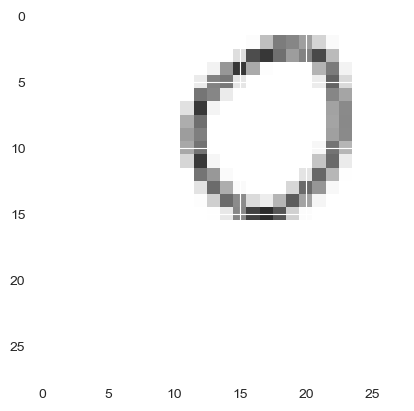

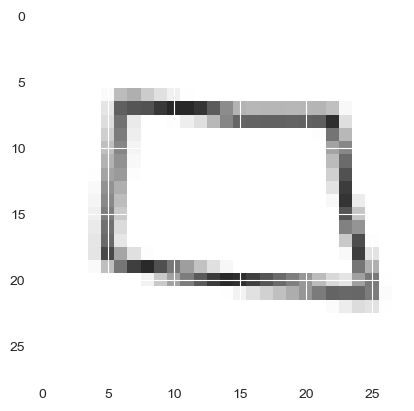

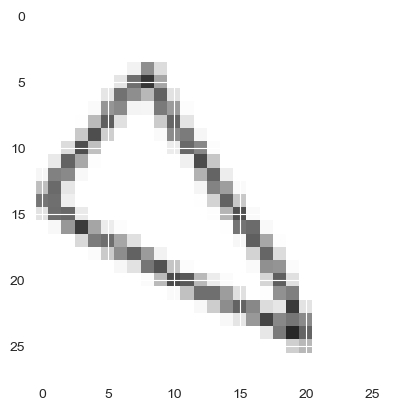

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def plot_image(path):
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.show()


plot_image(os.path.join(circles_path, os.listdir(circles_path)[0]))
plot_image(os.path.join(squares_path, os.listdir(squares_path)[0]))
plot_image(os.path.join(triangles_path, os.listdir(triangles_path)[0]))

In [57]:
from PIL import Image

images = []


def load_images(path):
    for image_path in os.listdir(path):
        image = Image.open(os.path.join(path, image_path)).convert('L')
        image = np.array(image).flatten()
        images.append(image)


load_images(circles_path)
load_images(squares_path)
load_images(triangles_path)

In [58]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

X = np.array(images)
y = np.concatenate((circles_labels, squares_labels, triangles_labels))

models = [
    BaggingClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

classification_results = pd.DataFrame(columns=['model', 'accuracy', "f1", "precision", "recall"])

for model in models:
    model_name = model.__class__.__name__
    scores = {"mean_accuracy": 0, "accuracy": [], "mean_f1": 0, "f1": [], "mean_precision":0, "precision": [],
              "mean_recall": 0, "recall": []}

    for train_index, text_index in kf.split(X, y):
        X_train, X_test = np.array(X)[train_index], np.array(X)[text_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[text_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        scores["accuracy"].append(accuracy_score(y_test, y_pred))
        scores["f1"].append(f1_score(y_test, y_pred, average='weighted'))
        scores["precision"].append(precision_score(y_test, y_pred, average='weighted'))
        scores["recall"].append(recall_score(y_test, y_pred, average='weighted'))

    classification_results = classification_results.append({
        "model": model_name,
        "mean_accuracy": np.mean(scores["accuracy"]),
        "mean_f1": np.mean(scores["f1"]),
        "mean_precision": np.mean(scores["precision"]),
        "mean_recall": np.mean(scores["recall"]),
        "accuracy": scores["accuracy"],
        "f1": scores["f1"],
        "precision": scores["precision"],
        "recall": scores["recall"]
    }, ignore_index=True)

classification_results.head()

/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_29840/2119774243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_29840/2119774243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_29840/2119774243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_29840/2119774243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

,model,accuracy,f1,precision,recall,mean_accuracy,mean_f1,mean_precision,mean_recall
0,BaggingClassifier,"[0.4666666666666667, 0.45, 0.5166666666666667,...","[0.4551874366767984, 0.44858674463937626, 0.51...","[0.48879310344827587, 0.4487254901960784, 0.54...","[0.4666666666666667, 0.45, 0.5166666666666667,...",0.466667,0.463360,0.485389,0.466667
1,RandomForestClassifier,"[0.6166666666666667, 0.5166666666666667, 0.633...","[0.6196628684433563, 0.5166666666666667, 0.632...","[0.6318798203237563, 0.5277375201288245, 0.632...","[0.6166666666666667, 0.5166666666666667, 0.633...",0.566667,0.567040,0.573054,0.566667
2,AdaBoostClassifier,"[0.5166666666666667, 0.36666666666666664, 0.51...","[0.5066447368421052, 0.36453308596165734, 0.51...","[0.5091168091168091, 0.36551282051282047, 0.52...","[0.5166666666666667, 0.36666666666666664, 0.51...",0.460000,0.455871,0.465125,0.460000
3,GradientBoostingClassifier,"[0.48333333333333334, 0.38333333333333336, 0.5...","[0.48849919119346225, 0.38568033273915625, 0.5...","[0.5072374727668846, 0.39141649413388546, 0.53...","[0.48333333333333334, 0.38333333333333336, 0.5...",0.463333,0.464353,0.477327,0.463333


- Za ansambelske metode (posebej za klasifikacijski problem in posebej za regresijski problem) izrišite grafikone kvartilov (angl. boxplot) za vsako izmed izračunanih metrik, pri čemer naj bodo v obeh primerih za vse štiri algoritme strojnega učenja grafikoni kvartilov združeni na eni sliki (skupno torej 7 slik).

In [60]:
import seaborn as sns

accuracy_results = {}
f1_results = {}
precision_results = {}
recall_results = {}

for model in models:
    model_name = model.__class__.__name__
    
    accuracy_results[model_name] = classification_results[classification_results['model'] == model_name]['accuracy'].values[0]
    f1_results[model_name] = classification_results[classification_results['model'] == model_name]['f1'].values[0]
    precision_results[model_name] = classification_results[classification_results['model'] == model_name]['precision'].values[0]
    recall_results[model_name] = classification_results[classification_results['model'] == model_name]['recall'].values[0]


accuracy_results = pd.DataFrame(accuracy_results)
f1_results = pd.DataFrame(f1_results)
precision_results = pd.DataFrame(precision_results)
recall_results = pd.DataFrame(recall_results)

accuracy_results = accuracy_results.melt(var_name='model', value_name='accuracy')
f1_results = f1_results.melt(var_name='model', value_name='f1')
precision_results = precision_results.melt(var_name='model', value_name='precision')
recall_results = recall_results.melt(var_name='model', value_name='recall')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

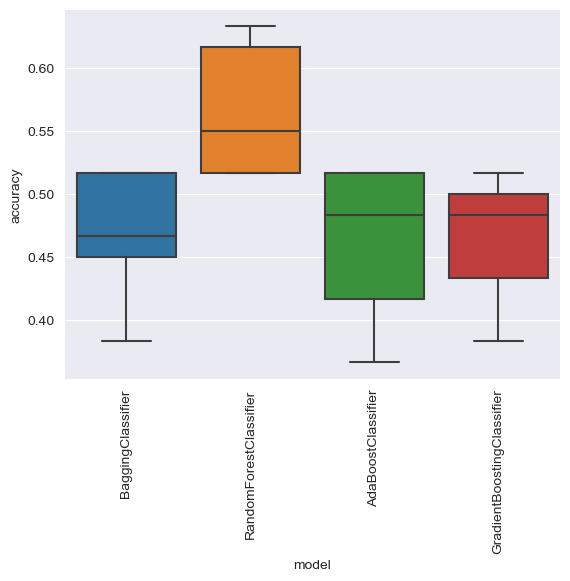

In [61]:
sns.boxplot(x='model', y='accuracy', data=accuracy_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

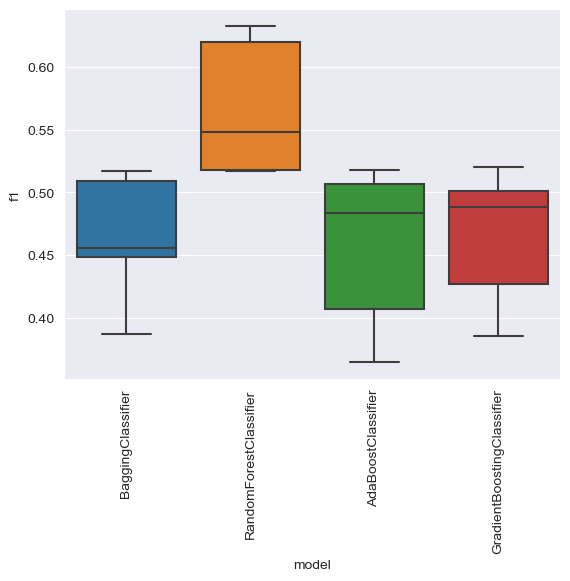

In [62]:
sns.boxplot(x='model', y='f1', data=f1_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

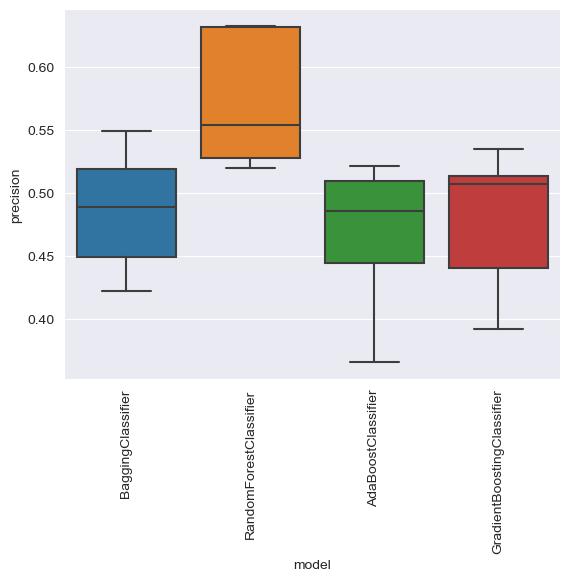

In [63]:
sns.boxplot(x='model', y='precision', data=precision_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

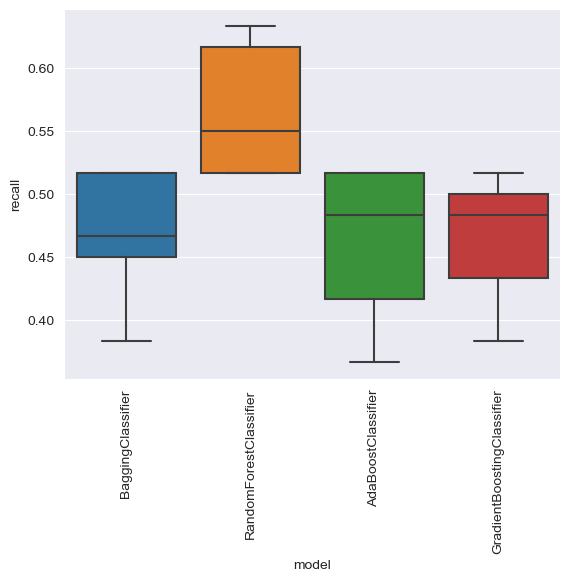

In [64]:
sns.boxplot(x='model', y='recall', data=recall_results)
plt.xticks(rotation=90)

- Izrišite stolpične diagrame za vse povprečne vrednosti posamezne metrike (posebej za klasifikacijski problem in posebej za regresijski problem) uporabljenih ansambelskih metod pri čemer pri klasifikacijskem problemu vključite rezultate pridobljene v nalogi 2, pri regresijskem problemu pa vključite rezultate pridobljene v nalogi 1 (skupno torej 7 slik).

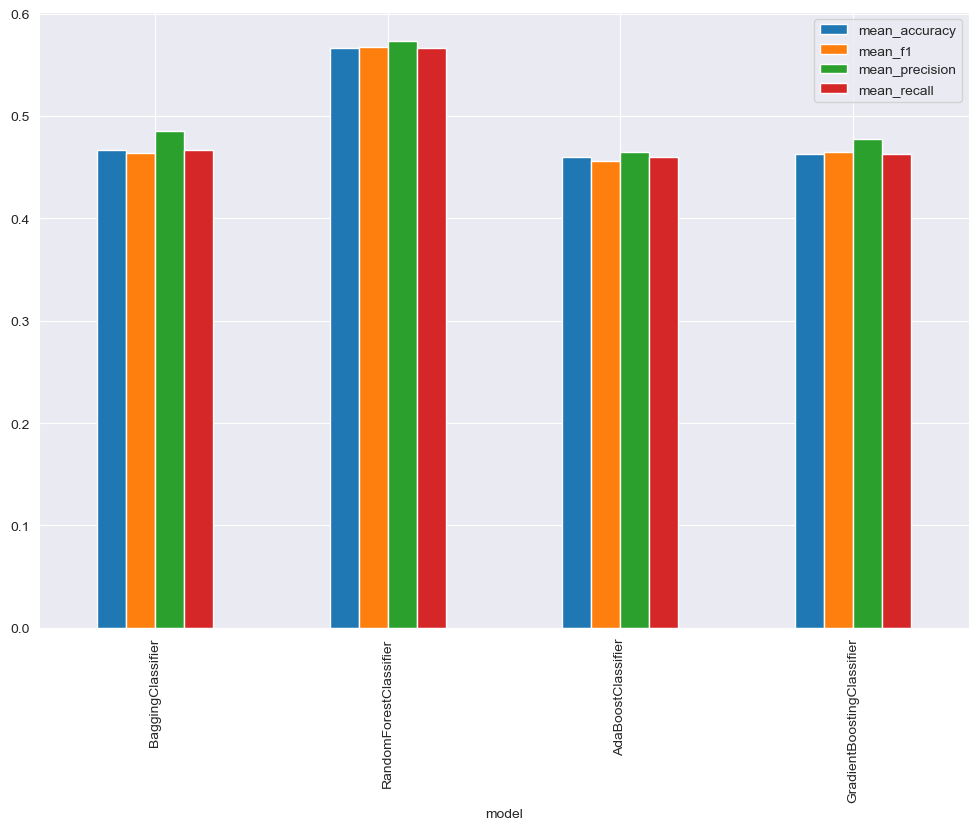

In [65]:
classification_results.plot.bar(x='model', y=['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall'], figsize=(12, 8))
plt.show()